In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir('drive')
os.chdir('MyDrive')
os.chdir('Research Project')

Mounted at /content/drive


In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import numpy as np

In [ ]:
train_data=pd.read_csv('train_data_all-MiniLM-L6-v2.csv')

In [ ]:
train_data = train_data.sample(n=6000, random_state=1, axis=0)
train_data

In [ ]:
train_x = train_data.to_numpy()[:,1:385]
train_y = train_data["sentiment"]

In [ ]:
from sklearn.decomposition import PCA

def pca_retain_95(standardized_data):

    # Create PCA object and fit the standardized data
    pca = PCA()
    pca.fit(standardized_data)

    # Determine the number of components to retain 95% information
    explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1

    # Perform PCA with the desired number of components
    pca = PCA(n_components=num_components)
    transformed_data = pca.fit_transform(standardized_data)

    return pca, transformed_data

In [ ]:
train_x

array([[-0.054089062, 0.040780272, -0.029104501, ..., -0.071475044,
        -0.0770072, 0.015722781],
       [0.02709336, 0.0432701, 0.04149887, ..., 0.0005186291,
        -0.08071646, -0.038263578],
       [-0.022679573, -0.10580976, 0.06943439, ..., 0.0877126,
        -0.00012282052, -0.0122109875],
       ...,
       [-0.024197323, -0.115192614, 0.10659813, ..., -0.067053035,
        -0.09164358, 0.019863153],
       [0.0017432559, -0.032661267, 0.008500522, ..., 0.05500228,
        -0.09503098, -0.033539046],
       [-0.04149526, -0.040858537, -0.044668682, ..., 0.037687816,
        0.08958909, -0.0400021]], dtype=object)

In [ ]:
pca1, transformed_data1 = pca_retain_95(train_x)

In [ ]:
pca1

PCA(n_components=257)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install gap-stat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt
from gap_statistic import OptimalK


# Define a range of cluster numbers to consider
min_clusters = 2
max_clusters = 15

# Perform spectral clustering for different numbers of clusters
gap_values = []
for n_clusters in range(min_clusters, max_clusters+1):
    sc = SpectralClustering(n_clusters=n_clusters)
    labels = sc.fit_predict(transformed_data1)

    # Calculate the within-cluster dispersion using the gap-statistic package
    optimal_k = OptimalK(parallel_backend='joblib')
    gap_value = optimal_k(transformed_data1, cluster_array=labels+1)
    gap_values.append(gap_value)

# Plot the gap values
plt.plot(range(min_clusters, max_clusters+1), gap_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Spectral Clustering')
plt.show()

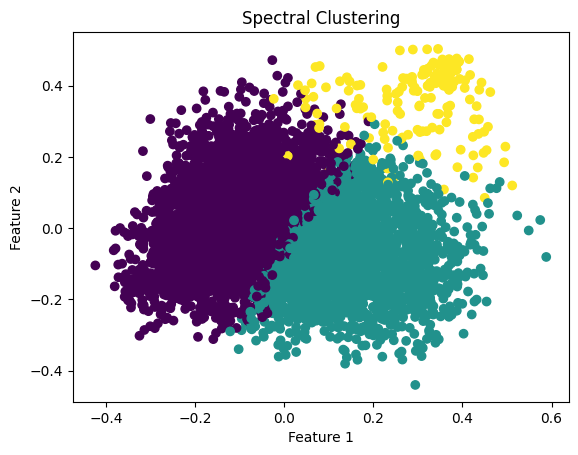

In [ ]:
# Plot the clustering results
plt.scatter(transformed_data1[:, 0], transformed_data1[:, 1], c=labels, cmap='viridis')
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
import umap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

X = transformed_data1
y = labels

# Perform UMAP dimensionality reduction
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(X)

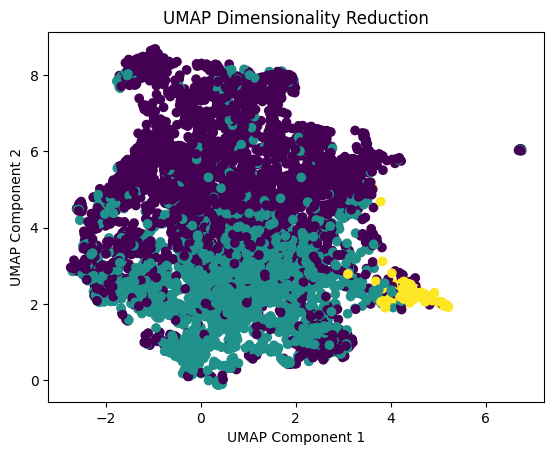

In [ ]:
# Plot the reduced data with labels
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis')
# plt.colorbar(ticks=range(len(data.target_names)))
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Dimensionality Reduction')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the class names to integers
labels = label_encoder.fit_transform(train_data['sentiment'])

# Print the original class names and their corresponding integers
for name, label in zip(train_data['sentiment'], labels):
    print(f"{name} -> {label}")

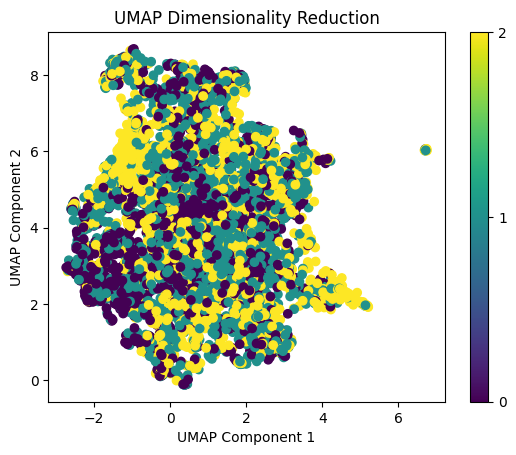

In [ ]:
# Plot the reduced data with labels
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
plt.colorbar(ticks=range(len(labels)))
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Dimensionality Reduction')
plt.show()